# Apache Arrow

## Comparison between Apache Arrow table and Pandas dataframe 

**Example - data:**

- ipl data deliveries and matches merged. (~34 MB)

*Refer my IPL data analysis repository 
[here](https://github.com/nagaraj-datascientist/ipl_data_analysis)*


In [0]:
# Import libraries

import pyarrow as pa
from pyarrow import csv
import pyarrow.parquet as pq

import pandas as pd

from datetime import datetime

import os
import sys


In [0]:
# Execution time function

def execution_time(bf, at):
    print(f'Before Execution - {bf}')
    print(f'After Execution  - {at}')
    print(f'Execution time   - {at-bf}')
    return at-bf

### File location

Used Google colab for development, Referred drive location in file_dir, change the proper file location before execution.

In [147]:
# File location

file_dir = '/content/drive/My Drive/GitHub/Apache_Arrow_Basic_Operations/data/'

# file_dir = '../data/'

file_loc = f'{file_dir}deliveries_and_matches.csv'

file_loc

'/content/drive/My Drive/GitHub/Apache_Arrow_Basic_Operations/data/deliveries_and_matches.csv'

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [148]:
# Read csv file in pandas

bf_time = datetime.now()
ipl_df = pd.read_csv(file_loc)
at_time = datetime.now()
ex_time = execution_time(bf_time, at_time)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Before Execution - 2020-04-25 07:47:53.137761
After Execution  - 2020-04-25 07:47:54.146415
Execution time   - 0:00:01.008654


### DtypeWarning

This warning is issued when dealing with larger files because the dtype checking happens per chunk read. [Refer](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.errors.DtypeWarning.html)


In [149]:
# Type of ipl_df - Pandas data frame

type(ipl_df)

pandas.core.frame.DataFrame

In [150]:
# Read csv file in pyarrow

bf_time = datetime.now()
ipl_arrow = csv.read_csv(file_loc)
at_time = datetime.now()
ex_time = execution_time(bf_time, at_time)

Before Execution - 2020-04-25 07:48:01.541524
After Execution  - 2020-04-25 07:48:01.924795
Execution time   - 0:00:00.383271


In [151]:
# Type of ipl_arrow - Arrow Table

type(ipl_arrow)

pyarrow.lib.Table

In [155]:
# File size

print(f'File size in Bytes - {os.path.getsize(file_loc)}')
print(f'File size in KB - {os.path.getsize(file_loc)/(1024):.2f}')
print(f'File size in MB - {os.path.getsize(file_loc)/(1024*1024):.2f}')

File size in Bytes - 35142635
File size in KB - 34318.98
File size in MB - 33.51


In [156]:
# System size of data frame

sys.getsizeof(ipl_df), ipl_df.__sizeof__()

(246863063, 246863039)

In [157]:
# System size of arrow table

sys.getsizeof(ipl_arrow), ipl_arrow.__sizeof__()

(48, 48)

In [158]:
# Info of data frame

ipl_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [159]:
# Schema of arrow table

ipl_arrow.schema

match_id: int64
inning: int64
batting_team: string
bowling_team: string
over: int64
ball: int64
batsman: string
non_striker: string
bowler: string
is_super_over: int64
wide_runs: int64
bye_runs: int64
legbye_runs: int64
noball_runs: int64
penalty_runs: int64
batsman_runs: int64
extra_runs: int64
total_runs: int64
player_dismissed: string
dismissal_kind: string
fielder: string
id: int64
season: int64
city: string
date: timestamp[s]
team1: string
team2: string
toss_winner: string
toss_decision: string
result: string
dl_applied: int64
winner: string
win_by_runs: int64
win_by_wickets: int64
player_of_match: string
venue: string
umpire1: string
umpire2: string
umpire3: string

### Datatype in Arrow Table

- Apache arrow recognized the date column as time object.

For datatype information, [Refer](https://arrow.apache.org/docs/python/api/datatypes.html)

For Pandas datatype to Arrow table datatype, [Refer](https://arrow.apache.org/docs/python/pandas.html#pandas-arrow-conversion)



In [160]:
# Shape of both arrow table and dataframe

ipl_arrow.shape, ipl_df.shape

((179078, 39), (179078, 39))

In [161]:
# arrow table to dataframe

ipl_arrow_df = ipl_arrow.to_pandas()
type(ipl_arrow_df)

pandas.core.frame.DataFrame

In [162]:
# Info of converted data frame

ipl_arrow_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   match_id          179078 non-null  int64         
 1   inning            179078 non-null  int64         
 2   batting_team      179078 non-null  object        
 3   bowling_team      179078 non-null  object        
 4   over              179078 non-null  int64         
 5   ball              179078 non-null  int64         
 6   batsman           179078 non-null  object        
 7   non_striker       179078 non-null  object        
 8   bowler            179078 non-null  object        
 9   is_super_over     179078 non-null  int64         
 10  wide_runs         179078 non-null  int64         
 11  bye_runs          179078 non-null  int64         
 12  legbye_runs       179078 non-null  int64         
 13  noball_runs       179078 non-null  int64         
 14  pena


### Null in Apache arrow

**By default**, when converting CSV to a string column, all CSV values are considered valid.

[Reference1](https://github.com/apache/arrow/issues/4184)

[Reference2](https://issues.apache.org/jira/browse/ARROW-5195) 

In [163]:
# Null count in a column

ipl_arrow.column('umpire3').null_count

0

In [164]:
# Top 5 in umpire3 from Arrow table

ipl_arrow.column('umpire3')[0:5]

[
  [
    "",
    "",
    "",
    "",
    ""
  ]
]

In [165]:
# Top 5 in umpire3 from pandas dataframe

ipl_df.umpire3.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: umpire3, dtype: object

In [0]:
csv.read_csv?

In [0]:
csv.ConvertOptions?

In [168]:
# Convert Options in Apache Arrow Table

co = csv.ConvertOptions(strings_can_be_null=True)

bf_time = datetime.now()
ipl_arrow2 = csv.read_csv(file_loc, convert_options=co)
at_time = datetime.now()
ex_time = execution_time(bf_time, at_time)


Before Execution - 2020-04-25 07:50:55.863457
After Execution  - 2020-04-25 07:50:56.234192
Execution time   - 0:00:00.370735


In [169]:
# Null count in umpire3 from Arrow table

ipl_arrow2.column('umpire3').null_count

150712

In [170]:
# Null/Nan count in umpire3 from Pandas dataframe

ipl_df.umpire3.isna().sum()

150712

In [0]:
# Arrow table to pandas dataframe

ipl_arrow_df2 = ipl_arrow2.to_pandas()

In [172]:
# Info of ipl_arrow_df2

ipl_arrow_df2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   match_id          179078 non-null  int64         
 1   inning            179078 non-null  int64         
 2   batting_team      179078 non-null  object        
 3   bowling_team      179078 non-null  object        
 4   over              179078 non-null  int64         
 5   ball              179078 non-null  int64         
 6   batsman           179078 non-null  object        
 7   non_striker       179078 non-null  object        
 8   bowler            179078 non-null  object        
 9   is_super_over     179078 non-null  int64         
 10  wide_runs         179078 non-null  int64         
 11  bye_runs          179078 non-null  int64         
 12  legbye_runs       179078 non-null  int64         
 13  noball_runs       179078 non-null  int64         
 14  pena

In [173]:
# Convert date column to datetime object

ipl_df = ipl_df.astype({'date': 'datetime64[ns]'})
ipl_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   match_id          179078 non-null  int64         
 1   inning            179078 non-null  int64         
 2   batting_team      179078 non-null  object        
 3   bowling_team      179078 non-null  object        
 4   over              179078 non-null  int64         
 5   ball              179078 non-null  int64         
 6   batsman           179078 non-null  object        
 7   non_striker       179078 non-null  object        
 8   bowler            179078 non-null  object        
 9   is_super_over     179078 non-null  int64         
 10  wide_runs         179078 non-null  int64         
 11  bye_runs          179078 non-null  int64         
 12  legbye_runs       179078 non-null  int64         
 13  noball_runs       179078 non-null  int64         
 14  pena

In [174]:
# Glimpse of ipl_df

ipl_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [175]:
# Glimpse of ipl_arrow_df2

ipl_arrow_df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,None,None,None,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,None
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,None,None,None,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,None
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,None,None,None,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,None
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,None,None,None,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,None
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,None,None,None,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,None


In [0]:
# Arrow to Ordered dictionary

ipl_dict = ipl_arrow.to_pydict()

In [177]:
# Type of ipl_dict

type(ipl_dict)

collections.OrderedDict

In [178]:
# ipl_dict columns

ipl_dict.keys()

odict_keys(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3'])

In [179]:
# Size of ipl_dict

sys.getsizeof(ipl_dict)

3008

In [180]:
# Top 5 umpire3 value

ipl_dict['umpire3'][0:5]

['', '', '', '', '']

In [0]:
# parquet file

pq.write_table(ipl_arrow2, f'{file_dir}deliveries_and_matches.parquet')

### Parquet file

Since it is binary format, it occupies less memory in disk. [Refer](https://parquet.apache.org/documentation/latest/)

In [182]:
# Parquet file

print(f"parquet file size in Bytes = {os.path.getsize(f'{file_dir}deliveries_and_matches.parquet')}")
print(f"parquet file size in KB = {os.path.getsize(f'{file_dir}deliveries_and_matches.parquet')/1024:.2f}")

parquet file size in Bytes = 816580
parquet file size in KB = 797.44


In [183]:
# Read parquet file in pyarrow

bf_time = datetime.now()
ipl_parquet_arrow = pq.read_table(f'{file_dir}deliveries_and_matches.parquet')
at_time = datetime.now()
ex_time = execution_time(bf_time, at_time)

Before Execution - 2020-04-25 07:51:41.692773
After Execution  - 2020-04-25 07:51:41.858174
Execution time   - 0:00:00.165401


In [184]:
# Null count of umpire3 from parquet file

ipl_parquet_arrow.column('umpire3').null_count

150712

In [0]:
# Arrow to Ordered dictionary

ipl_dict2 = ipl_arrow2.to_pydict()

In [186]:
# Top 5 umpire3 value

ipl_dict2['umpire3'][0:5]

[None, None, None, None, None]

In [187]:
# Read parquet file in pandas

bf_time = datetime.now()
ipl_parquet_df = pd.read_parquet(f'{file_dir}deliveries_and_matches.parquet')
at_time = datetime.now()
ex_time = execution_time(bf_time, at_time)


Before Execution - 2020-04-25 07:51:46.491392
After Execution  - 2020-04-25 07:51:46.773959
Execution time   - 0:00:00.282567


In [188]:
# Info of ipl_parquet_df

ipl_parquet_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   match_id          179078 non-null  int64         
 1   inning            179078 non-null  int64         
 2   batting_team      179078 non-null  object        
 3   bowling_team      179078 non-null  object        
 4   over              179078 non-null  int64         
 5   ball              179078 non-null  int64         
 6   batsman           179078 non-null  object        
 7   non_striker       179078 non-null  object        
 8   bowler            179078 non-null  object        
 9   is_super_over     179078 non-null  int64         
 10  wide_runs         179078 non-null  int64         
 11  bye_runs          179078 non-null  int64         
 12  legbye_runs       179078 non-null  int64         
 13  noball_runs       179078 non-null  int64         
 14  pena

In [189]:
# Glimpse of ipl_parquet_df

ipl_parquet_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,None,None,None,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,None
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,None,None,None,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,None
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,None,None,None,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,None
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,None,None,None,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,None
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,None,None,None,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,None


In [0]:
# arrow file

pq.write_table(ipl_arrow2, f'{file_dir}deliveries_and_matches.arrow')

In [191]:
# Read arrow file in pyarrow

bf_time = datetime.now()
ipl_arrow_arrow = pq.read_table(f'{file_dir}deliveries_and_matches.arrow')
at_time = datetime.now()
ex_time = execution_time(bf_time, at_time)

Before Execution - 2020-04-25 07:51:57.191805
After Execution  - 2020-04-25 07:51:57.287284
Execution time   - 0:00:00.095479


In [192]:
# Read arrow file in pandas

bf_time = datetime.now()
ipl_arrow_df = pd.read_parquet(f'{file_dir}deliveries_and_matches.arrow')
at_time = datetime.now()
ex_time = execution_time(bf_time, at_time)


Before Execution - 2020-04-25 07:51:57.297587
After Execution  - 2020-04-25 07:51:57.548787
Execution time   - 0:00:00.251200


### Arrow file

Since it is also binary format, it occupies less memory in disk. 

Difference between arrow file and parquet file.

In short, Parquet files are designed for disk storage, while Arrow is designed for in-memory use, but you can put it on disk and then memory-map later. Arrow and Parquet are intended to be compatible with each other and used together in applications.

If your disk storage or network is slow, Parquet may be a better choice.

[Refer](https://arrow.apache.org/faq/)

### Apache Arrow projects

Few of them,

- **Petastorm** enables single machine or distributed training and evaluation of deep learning models directly, Supports popular Python-based machine learning (ML) frameworks such as Tensorflow, Pytorch, and PySpark

- **Dremio** reads data from any source (RDBMS, HDFS, S3, NoSQL) into Arrow buffers, and provides fast SQL access via ODBC, JDBC, and REST for BI, Python, R, and more (all backed by Apache Arrow).

- **Perspective** is a streaming data visualization engine in JavaScript for building real-time & user-configurable analytics entirely in the browser.

[Refer](https://arrow.apache.org/powered_by/)

### Plasma In-Memory object store

Plasma holds immutable objects in shared memory so that they can be accessed efficiently by many clients across process boundaries.


**As present, Plasma is only supported for use on Linux and macOS.**

[Reference1](https://arrow.apache.org/blog/2017/08/08/plasma-in-memory-object-store/)

[Reference2](https://arrow.apache.org/docs/python/plasma.html)



## Conclusion

Apache arrow supports columnar in-memory formats and zero-copy shared memory. 

In [193]:
%time ipl_df = pd.read_csv(file_loc)

CPU times: user 583 ms, sys: 25.8 ms, total: 608 ms
Wall time: 643 ms


<string>:2: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.


In [194]:
%time ipl_arrow = csv.read_csv(file_loc)

CPU times: user 412 ms, sys: 154 ms, total: 566 ms
Wall time: 334 ms


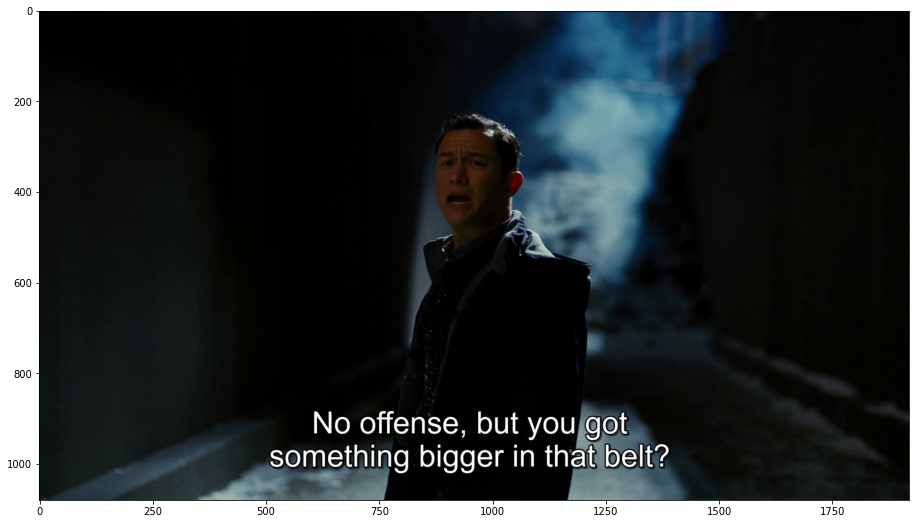

In [195]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

img = mpimg.imread(f'{file_dir}Bigger.png')
plt.figure(figsize=(16,9))
plt.imshow(img)